In [112]:
# %pylab inline
%matplotlib notebook
from matplotlib.pyplot import *
from numpy import *
from scipy.misc import *

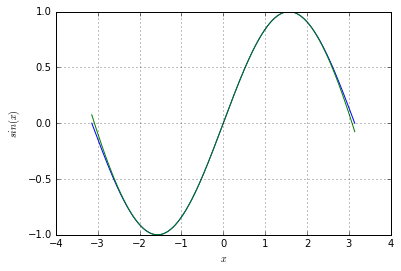

In [109]:
# Exe 1 
# (a)
def sin_poly_7(x):
    return x - x**3/factorial(3) + x**5/factorial(5) - x**7/factorial(7)
# x = arange(-pi, pi, pi/12)
x = linspace(-pi, pi, 1000)
figure('exe 1')
xlabel("$x$")
ylabel("$sin(x)$")
y = sin(x)
y_about_7 = sin_poly_7(x)
plot(x, y, 'b')
plot(x, y_about_7, 'g')
grid()
show()

In [44]:
#(b)
true_errors = abs(y-y_about_7)
print("x =",x[argmax(true_errors)], "true error = ", max(true_errors))


x = -3.14159265359 true error =  0.0752206159036


<IPython.core.display.Javascript object>


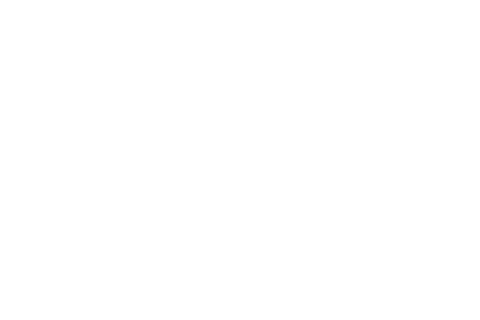

9776513.42771


<IPython.core.display.Javascript object>


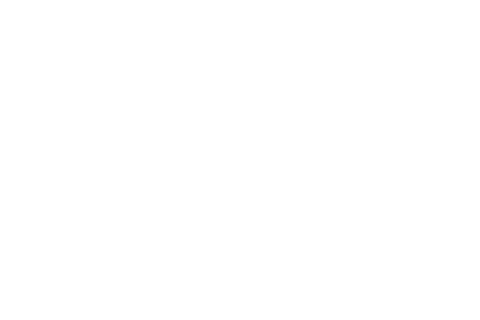

In [129]:
#(c)
def sin_poly_5(x):
    return x - x**3/factorial(3) + x**5/factorial(5) 
y_about_5 = sin_poly_5(x)
figure("c")
plot(x, y_about_7)
plot(x, y_about_5)
rel_errors = (y_about_7 - y_about_5)/(y_about_7)
# print(rel_errors)
print(max(rel_errors))


In [93]:
# (d)
x = linspace(-pi, pi, 1000)
# x = array([pi, pi/2])
y = sin(x)
n = 8             # Number of significant figures
es = 0.5*10**(-n) # Stop criteria
y_about = x             # First term of series approximation
i = 1             # Number of terms
imax = 20         # Maximum iterations


while i < imax:
    
    # Add next term in series
    y_about = y_about + (-1)**(i)*x**(2*i+1)/factorial(2*i+1)
#     print(y_about)
    i += 1
    
    # True error
    et = y_about - y

#     print(max(et))
    # Relative true error
#     et_rel = et/abs(y)
#     print(et_rel)
    # Break the loop if criteria fullfilled
#     print(max(et_rel))
    if max(et) <= es:
        break
# plot(x, y)
# plot(x, y_about(x, 3))

# print("Significant figure:  {0:1d}".format(n))
print("Number of terms:     {0:1d}".format(i))
print("Estimated value:     {0:.16f}".format(y_about[argmax(et)]))
print("True value:          {0:.16f}".format(y[argmax(et)]))
print("True error:          {0:.16f}".format(max(et)))
# # print("Relative true error: {0:.16f}".format(et_rel)) 
# print("Stop criteria:       {0:.16f}".format(es))

Number of terms:     10
Estimated value:     0.0000000005289183
True value:          -0.0000000000000001
True error:          0.0000000005289184


Populating the interactive namespace from numpy and matplotlib


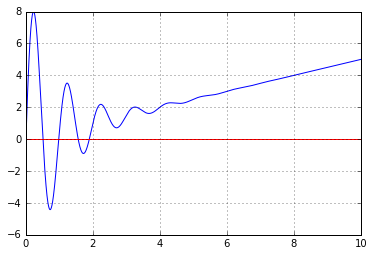

-4.42181768538
0.722072207221


In [188]:
# ex3
%pylab inline
def f3(x):
    return 10.0*e**(-x)*sin(2.0*pi*x) + 0.5*x
x = linspace(0, 10, 10000)
figure("ex3")
plot(x, f3(x))
axhline(0, color = 'r')
grid()
show()
print(min(f3(x)))
print(x[argmin(f3(x))])

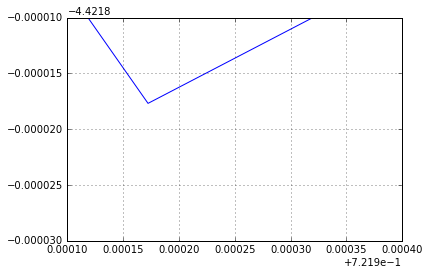

0.72207


In [201]:
plot(x, f3(x))
xlim(0.722, 0.7223)
ylim(-4.42177 + array([-0.00006, -0.00004]))
grid()
show()
print(.7219+0.00017)

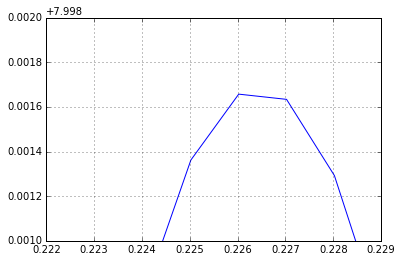

In [202]:
figure()
plot(x, f3(x))
xlim(0.222, 0.229)
ylim(7.999, 8.000)
grid()
show()

In [208]:
def gaussian(a,b):
    a = a.copy().astype(float)
    b = b.copy().astype(float)
    n = len(a)
    x = zeros(n)    

    for k in range(n):
        if a[k, k] == 0:
            print('unable to solve')
            return None
        # forward eliminate
        for i in range(k+1, n):
            factor = a[i, k]/a[k, k]
            for j in range(k+1, n):
                a[i, j] = a[i, j] - factor * a[k,j]
            b[i] = b[i] - factor*b[k]
        # back substitution
        for i in range(n-1, -1, -1):
            s = 0
            for j in range(i+1, n):
                s = s + a[i, j] * x[j]
            x[i] = (b[i] - s)/a[i,i]
#             x[i] = (b[i] - dot(a[i, i+1:], x[i+1:])) / a[i,i]

    return x

A = array([[10.0, 2.0, -1.0], [-3.0, -6.0, 2.0], [1.0, 1.0, 5.0]])
b = array([27.0, -61.5, -21.5])
x = gaussian(A, b)
print('Solution: x = ', x)

Solution: x =  [ 0.5  8.  -6. ]


In [221]:
def pivot(A, row1, row2):
    temp = A[row2].copy()
    A[row2] = A[row1]
    A[row1] = temp
    return A

def gaussSeidel(A, b, x0, omega):   
    x = x0
    for k in range(100):
        for i in range(n):
            s = 0
            for j in range(n):
                if j != i:
                    s = s + A[i, j] * x[j]
            x[i] = omega/A[i, i] * (b[i] - s) + (1 - omega)*x[i]
    return x

A = array([-2, 5, 9, 7, 1, 1, -3, 7, -1]).reshape(3, 3)
b = array([1, 6, -26])  
# find x0 
n = len(b)
x0 = zeros(n)
for i in range(len(x0)):
    x0[i] = b[i] / A[i, i]
    
print(gaussSeidel(A, b, x0, 1.1))
print('Solution by solve function: ')
print(solve(A, b))

[ -5.56064309e+252   4.39861211e+253   3.57148366e+254]
Solution by solve function: 
[ 1. -3.  2.]


In [239]:
def pivot(A, row1, row2):
    temp = A[row2].copy()
    A[row2] = A[row1]
    A[row1] = temp
    return A
def transform(A, b):
    n = len(A)
    for i in range(n):
#         print(A[i:, i])
        r = argmax(abs(A[i:, i])) + i 
        if (i != r):
            A = pivot(A, i, r)
            b = pivot(b, i, r)
            


# A = array([7, 1, 1, -3, 7, -1, -2, 5, 9]).reshape(3, 3)
# transform(A, b)
# print(A)
# print(b)

def gaussSeidel(A, b, x0, omega): 
    transform(A, b)
    x = x0
    for k in range(100):
        for i in range(n):
            s = 0
            for j in range(n):
                if j != i:
                    s = s + A[i, j] * x[j]
            x[i] = omega/A[i, i] * (b[i] - s) + (1 - omega)*x[i]
    return x

A = array([-2, 5, 9, 7, 1, 1, -3, 7, -1]).reshape(3, 3)
b = array([1, 6, -26])
n = len(b)
x0 = zeros(n)
for i in range(len(x0)):
    x0[i] = b[i] / A[i, i]
    
print(gaussSeidel(A, b, x0, 1.1))
print('Solution by solve function: ')
print(solve(A, b))

[ 1. -3.  2.]
Solution by solve function: 
[ 1. -3.  2.]
